In [49]:
def de_bruijn_ize(st, k):
    """Creates DeBruijn graph given a string and kmer length k
        We wil take all k-mers from the string, Get the L-R k-1 mers. Create nodes for the L-R k-1 mers if they dont exist. 
        Create an edge beteween the L-R  k-1 mers"""
    edges = [] # create list of edges  
    nodes = set() # create set of nodes
    for i in range(len(st) - k + 1): # Go from 0 to laasst position where k-mer could start
        edges.append((st[i:i+k-1], st[i+1:i+k])) # The L and R k-1 mers as a tuple
        nodes.add(st[i:i+k-1]) # Add L k-1 mer to nodes
        nodes.add(st[i+1:i+k])# Add R k-1 mer to nodes    
    return nodes, edges  

In [50]:
nodes, edges = de_bruijn_ize('ACGCGTCG',3)

In [51]:
# all k-1mers
print(nodes)

{'AC', 'TC', 'GT', 'GC', 'CG'}


In [52]:
# The order of edges are the Eulerian walk for the DeBruijn graph
print(edges)

[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [53]:
def visualize_de_bruijn(st,k):
    """Visualize a directed mutltigraph using graphviz"""
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph"{\n'
    for node in nodes:
        dot_str += ' %s [label=%s] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += ' %s -> %s ; \n' %(src, dst)
    return dot_str + '}\n'    
                                         

In [15]:
# Python plugin to visualize graph
!pip install gvmagic

  Created wheel for gvmagic: filename=gvmagic-0.5-py3-none-any.whl size=10379 sha256=8f72f4b890d15536963a18ca07c1f13e1c934e960dca07db9d68cc0570509f4f
  Stored in directory: c:\users\syeda\appdata\local\pip\cache\wheels\e5\ad\b2\2ba1aaaf5b2004d96473291c80f98d4524a01c6d6e9d468172
Successfully built gvmagic


You should consider upgrading via the 'c:\python3\python-3.7.4.amd64\python.exe -m pip install --upgrade pip' command.


In [41]:
# Impot modles to visualize graph
import gvmagic
import graphviz

In [54]:
dbg = visualize_de_bruijn('ACGCGTCG',3)
print(dbg)

digraph "DeBruijn graph"{
 AC [label=AC] ;
 TC [label=TC] ;
 GT [label=GT] ;
 GC [label=GC] ;
 CG [label=CG] ;
 AC -> CG ; 
 CG -> GC ; 
 GC -> CG ; 
 CG -> GT ; 
 GT -> TC ; 
 TC -> CG ; 
}



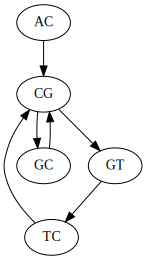

In [57]:
# DeBruijn Graph
dot = graphviz.Source(dbg)
#dot.render('test.gv', view=True)
dot

k = 5

In [58]:
nodes, edges = de_bruijn_ize('a_long_long_long_time', 5)

In [59]:
print(nodes)

{'a_lo', '_lon', 'g_lo', 'ng_l', 'g_ti', 'ong_', 'long', 'time', 'ng_t', '_tim'}


In [60]:
print(edges)

[('a_lo', '_lon'), ('_lon', 'long'), ('long', 'ong_'), ('ong_', 'ng_l'), ('ng_l', 'g_lo'), ('g_lo', '_lon'), ('_lon', 'long'), ('long', 'ong_'), ('ong_', 'ng_l'), ('ng_l', 'g_lo'), ('g_lo', '_lon'), ('_lon', 'long'), ('long', 'ong_'), ('ong_', 'ng_t'), ('ng_t', 'g_ti'), ('g_ti', '_tim'), ('_tim', 'time')]


In [61]:
dbg = visualize_de_bruijn('a_long_long_long_time', 5)
dot = graphviz.Source(dbg)

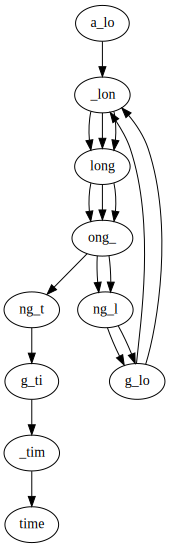

In [62]:
dot

In [90]:
nodes, edges = de_bruijn_ize('ZABCDABEFABY', 3)

In [67]:
dbg = visualize_de_bruijn('ZABCDABEFABY', 3)
dot = graphviz.Source(dbg)

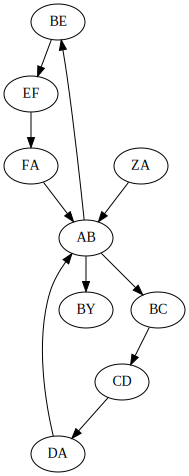

In [68]:
dot

In [81]:
nodes, edges = de_bruijn_ize("to_every_thing_turn_turn_turn_there_is_a_season", 4)
dbg = visualize_de_bruijn("to_every_thing_turn_turn_turn_there_is_a_season", 4)

In [82]:
dot = graphviz.Source(dbg)

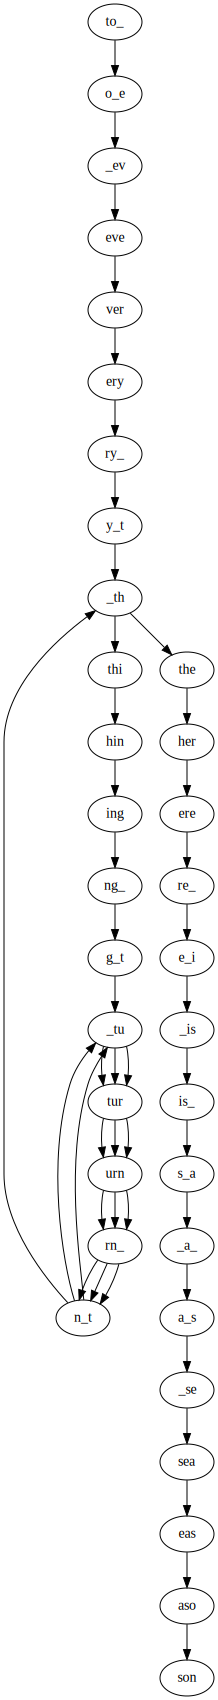

In [83]:
dot